In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(
    style="whitegrid",
    rc={
        "figure.figsize": (14, 7),
        "axes.titlesize": 22,
        "axes.labelsize": 16,
        "xtick.labelsize": 13,
        "ytick.labelsize": 13,
        "axes.titlepad": 18,
        "axes.edgecolor": "#2d2d2d",
    }
)

DARK_BLUE = sns.color_palette("Blues", 8)[6]
MID_BLUE = sns.color_palette("Blues", 8)[4]
LIGHT_BLUE = sns.color_palette("Blues", 8)[2]



In [2]:
df = pd.read_csv("../data/ml_input_full.csv")

print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (5986025, 46)
   ARREST_KEY ARREST_DATE arrest_date_day  Year  Month  Day  Hour  Weekday  \
0   298672659  2024-12-31      2024-12-31  2024     12   31     0        1   
1   298692609  2024-12-31      2024-12-31  2024     12   31     0        1   
2   298692620  2024-12-31      2024-12-31  2024     12   31     0        1   
3   298685051  2024-12-31      2024-12-31  2024     12   31     0        1   
4   298694799  2024-12-31      2024-12-31  2024     12   31     0        1   

   WeekOfYear  Quarter  ...  Longitude_scaled  total_arrests  felony_rate  \
0           1        4  ...          0.001850         109910     0.351415   
1           1        4  ...          0.004682          41067     0.346288   
2           1        4  ...          0.003724          78123     0.247648   
3           1        4  ...          0.003674          34144     0.242590   
4           1        4  ...          0.001622          34453     0.325922   

   violent_rate daily_arrests  arrests_

In [3]:
def plot_count(df, col, title, xlabel=None):
    """Clean bar chart for categorical variables."""
    plt.figure(figsize=(14, 6))

    counts = df[col].value_counts()
    sns.barplot(
        x=counts.index,
        y=counts.values,
        color=BLUE_LIGHT,
        edgecolor=BLUE
    )
    plt.title(title)
    plt.xlabel(xlabel if xlabel else col)
    plt.ylabel("Number of Arrests")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def sorted_age_groups(series):
    """Sort age groups logically."""
    order = ["<18", "18-24", "25-44", "45-64", "65+", "UNKNOWN"]
    return pd.Categorical(series, categories=order, ordered=True)


def plot_line(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(14, 6))
    sns.lineplot(x=x, y=y, marker="o", color=BLUE)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

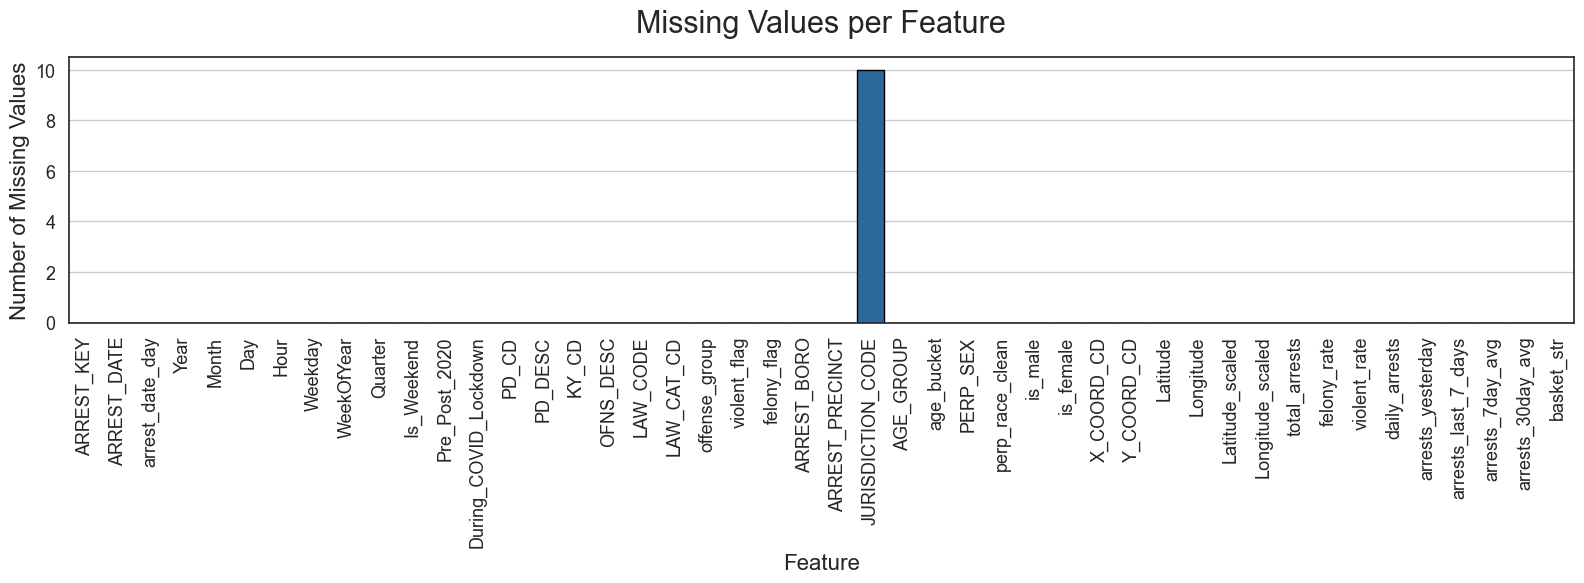

In [4]:
plt.figure(figsize=(16,6))
missing = df.isnull().sum()

sns.barplot(
    x=missing.index,
    y=missing.values,
    color=DARK_BLUE,
    edgecolor="black"
)

plt.title("Missing Values per Feature", fontsize=22)
plt.xlabel("Feature")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

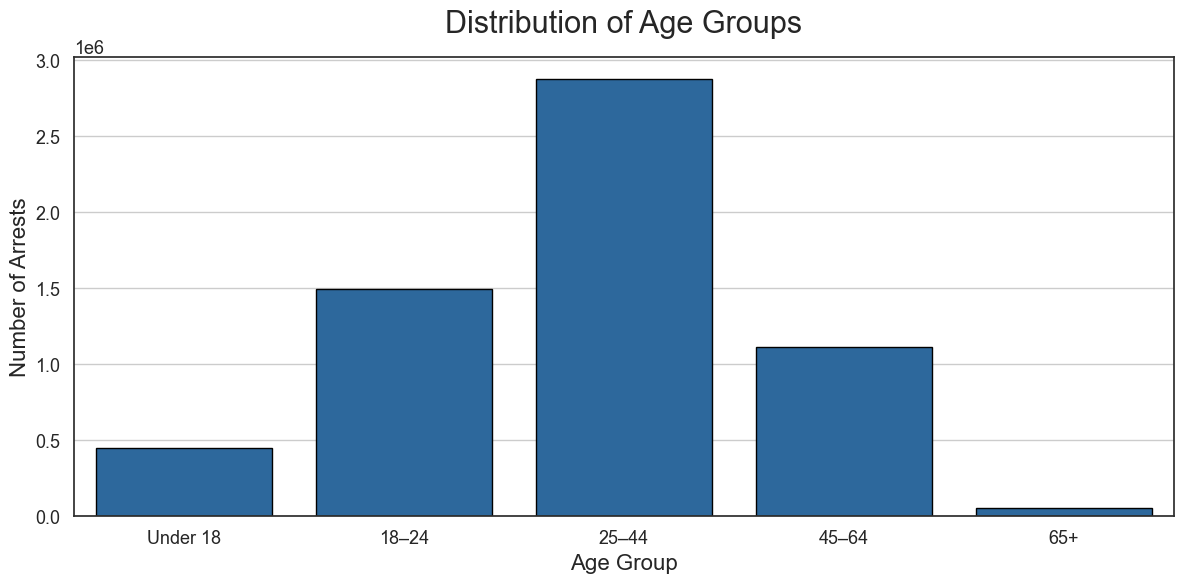

In [5]:
# Fix inconsistent labels
df["AGE_GROUP"] = df["AGE_GROUP"].replace({
    "<18": "Under 18",
    "18-24": "18–24",
    "25-44": "25–44",
    "45-64": "45–64",
    "65+": "65+",
})

age_order = ["Under 18", "18–24", "25–44", "45–64", "65+"]

plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x="AGE_GROUP",
    order=age_order,
    color=DARK_BLUE,
    edgecolor="black"
)
plt.title("Distribution of Age Groups", fontsize=22)
plt.xlabel("Age Group")
plt.ylabel("Number of Arrests")
plt.tight_layout()
plt.show()


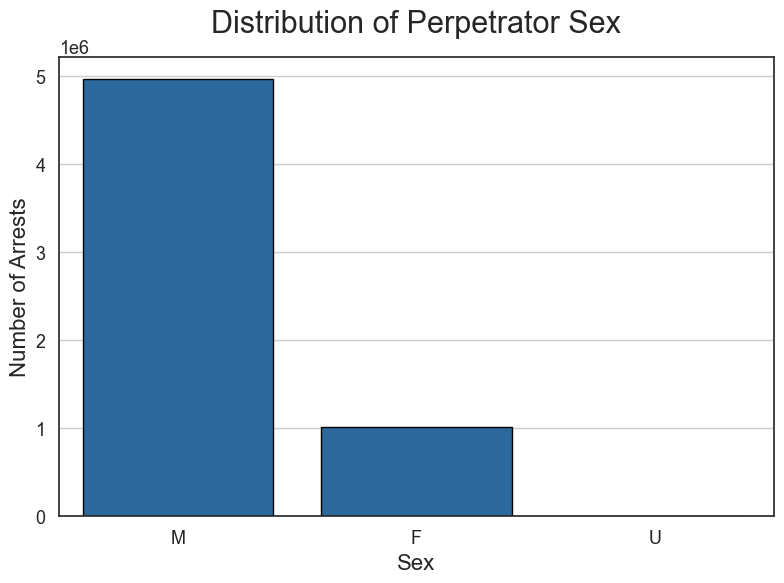

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=df,
    x="PERP_SEX",
    color=DARK_BLUE,
    edgecolor="black"
)
plt.title("Distribution of Perpetrator Sex", fontsize=22)
plt.xlabel("Sex")
plt.ylabel("Number of Arrests")
plt.tight_layout()
plt.show()


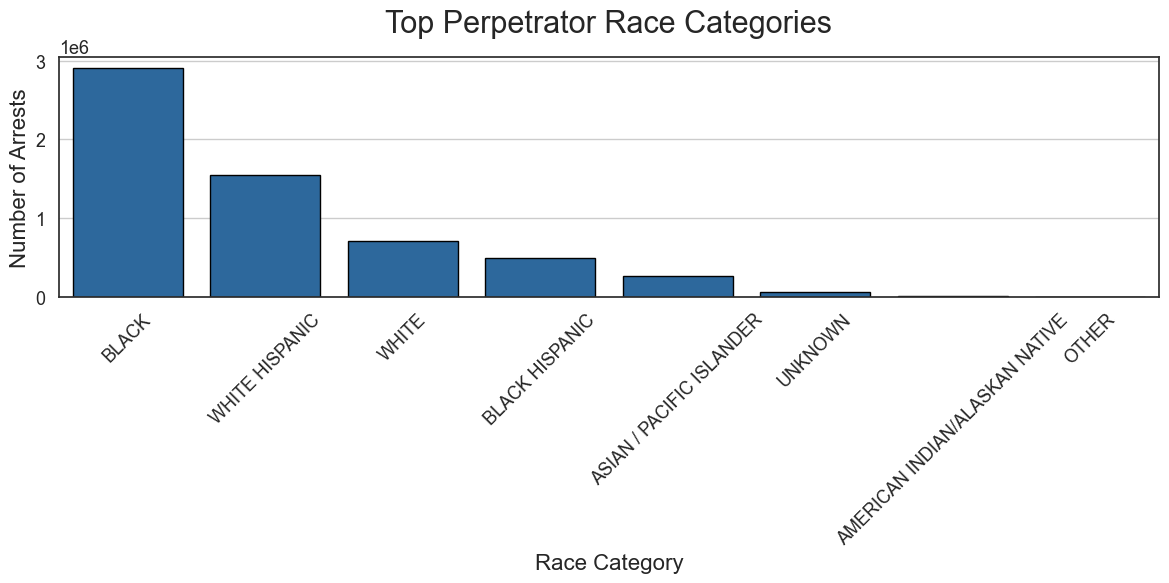

In [7]:
race_counts = df["perp_race_clean"].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x=race_counts.index,
    y=race_counts.values,
    color=DARK_BLUE,
    edgecolor="black"
)
plt.title("Top Perpetrator Race Categories", fontsize=22)
plt.xlabel("Race Category")
plt.ylabel("Number of Arrests")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


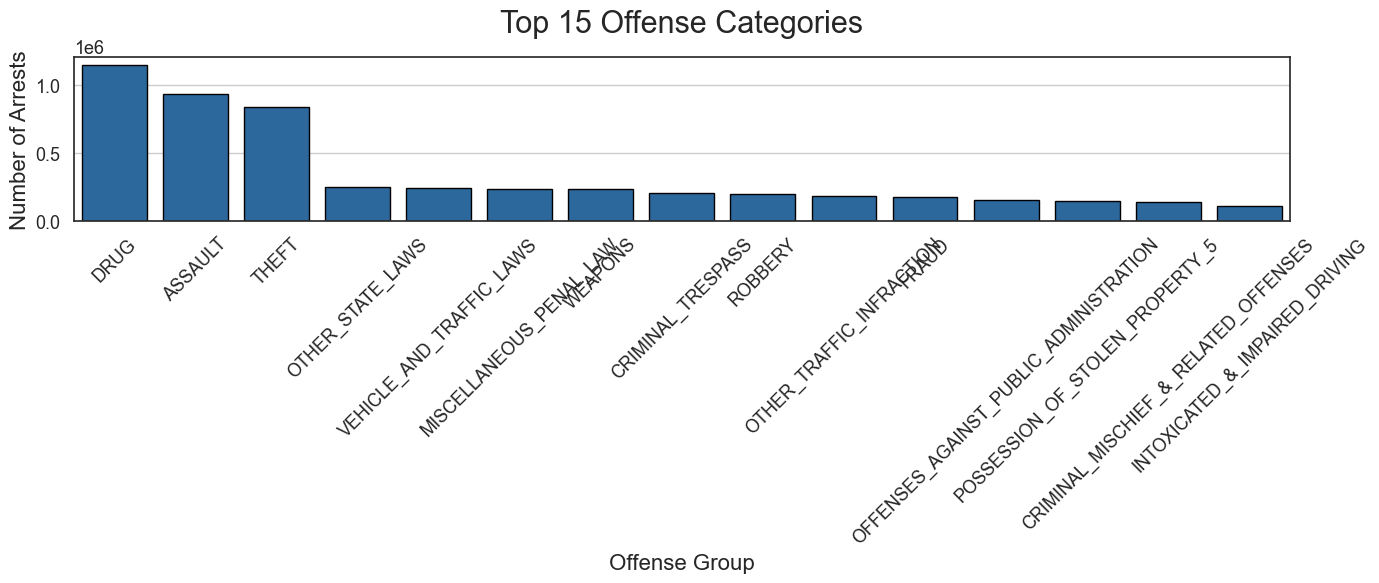

In [8]:
top_off = df["offense_group"].value_counts().head(15)

plt.figure(figsize=(14,6))
sns.barplot(
    x=top_off.index,
    y=top_off.values,
    color=DARK_BLUE,
    edgecolor="black"
)
plt.title("Top 15 Offense Categories", fontsize=22)
plt.xlabel("Offense Group")
plt.ylabel("Number of Arrests")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


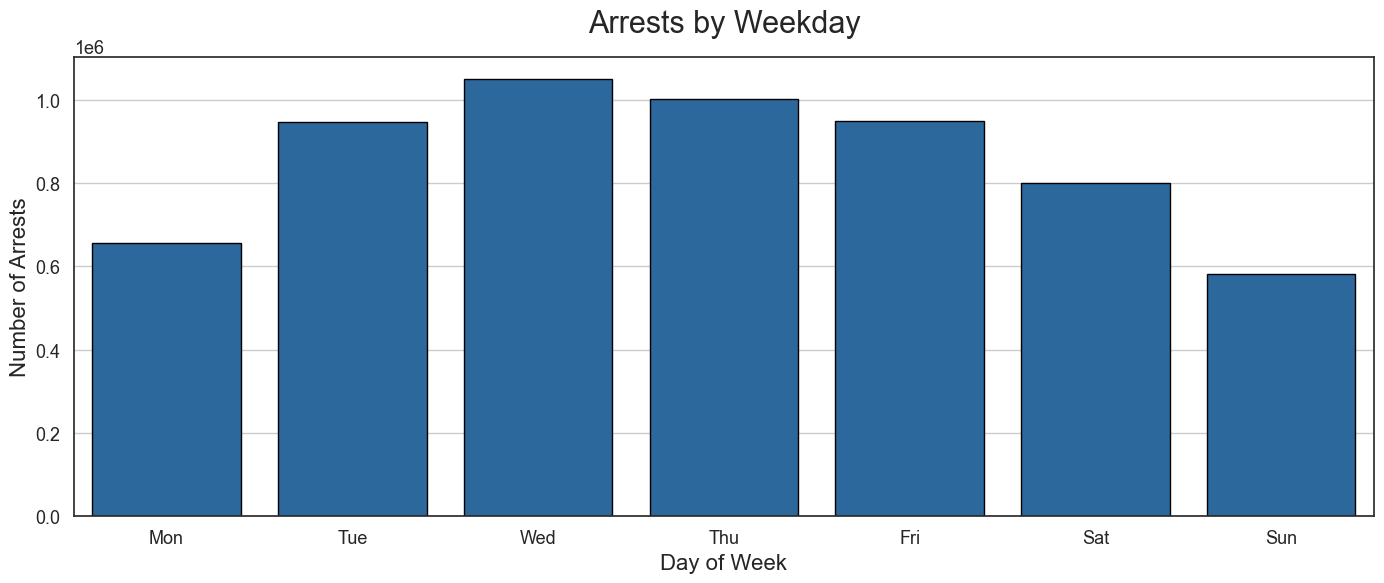

In [9]:
weekday_map = {0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}

df_wd = df.groupby("Weekday").size()

plt.figure(figsize=(14,6))
sns.barplot(
    x=[weekday_map[i] for i in df_wd.index],
    y=df_wd.values,
    color=DARK_BLUE,
    edgecolor="black"
)
plt.title("Arrests by Weekday", fontsize=22)
plt.xlabel("Day of Week")
plt.ylabel("Number of Arrests")
plt.tight_layout()
plt.show()


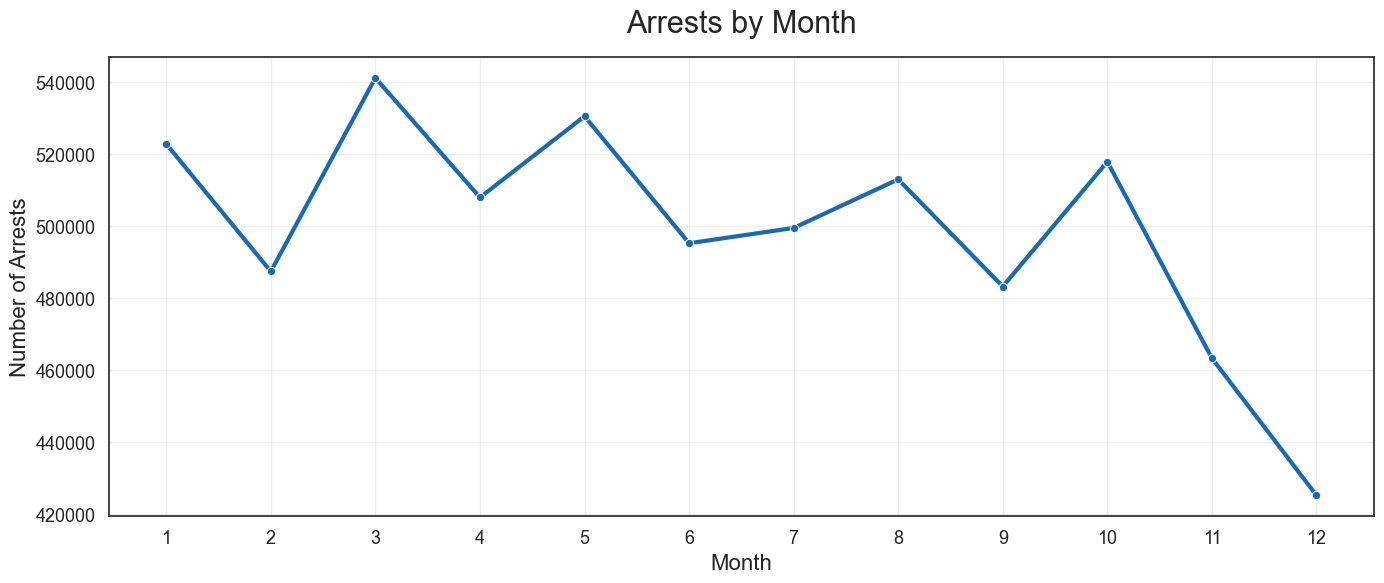

In [10]:
df_month = df.groupby("Month").size()

plt.figure(figsize=(14,6))
sns.lineplot(
    x=df_month.index,
    y=df_month.values,
    marker="o",
    linewidth=3,
    color=DARK_BLUE
)
plt.title("Arrests by Month", fontsize=22)
plt.xlabel("Month")
plt.ylabel("Number of Arrests")
plt.grid(alpha=0.3)
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()


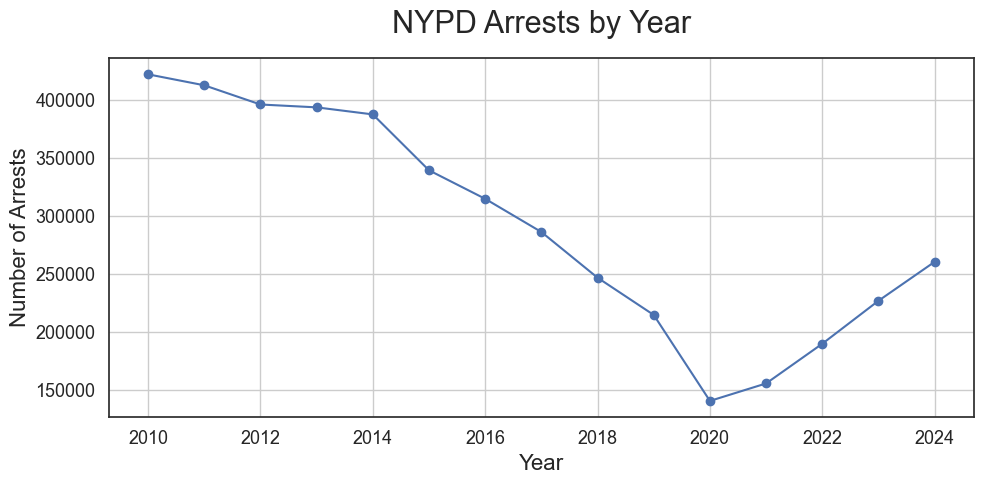

In [11]:
df["ARREST_DATE"] = pd.to_datetime(df["ARREST_DATE"], errors="coerce")

# 2. Extract year
df["YEAR"] = df["ARREST_DATE"].dt.year

# (Optional) filter years if you want a window, e.g. 2010 onwards
df_year = df[df["YEAR"] >= 2010].copy()

# 3. Group by year
arrests_by_year = df_year["YEAR"].value_counts().sort_index()

# 4. Plot
plt.figure(figsize=(10, 5))
plt.plot(arrests_by_year.index, arrests_by_year.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.title("NYPD Arrests by Year")
plt.tight_layout()
plt.grid(True)
plt.show()

/Users/aashshah/Documents/coding/nyc_crime/.venv/lib/python3.14/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/var/folders/4l/ps8gtn856617_4nt7nzqdfm80000gn/T/ipykernel_14733/2691821203.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


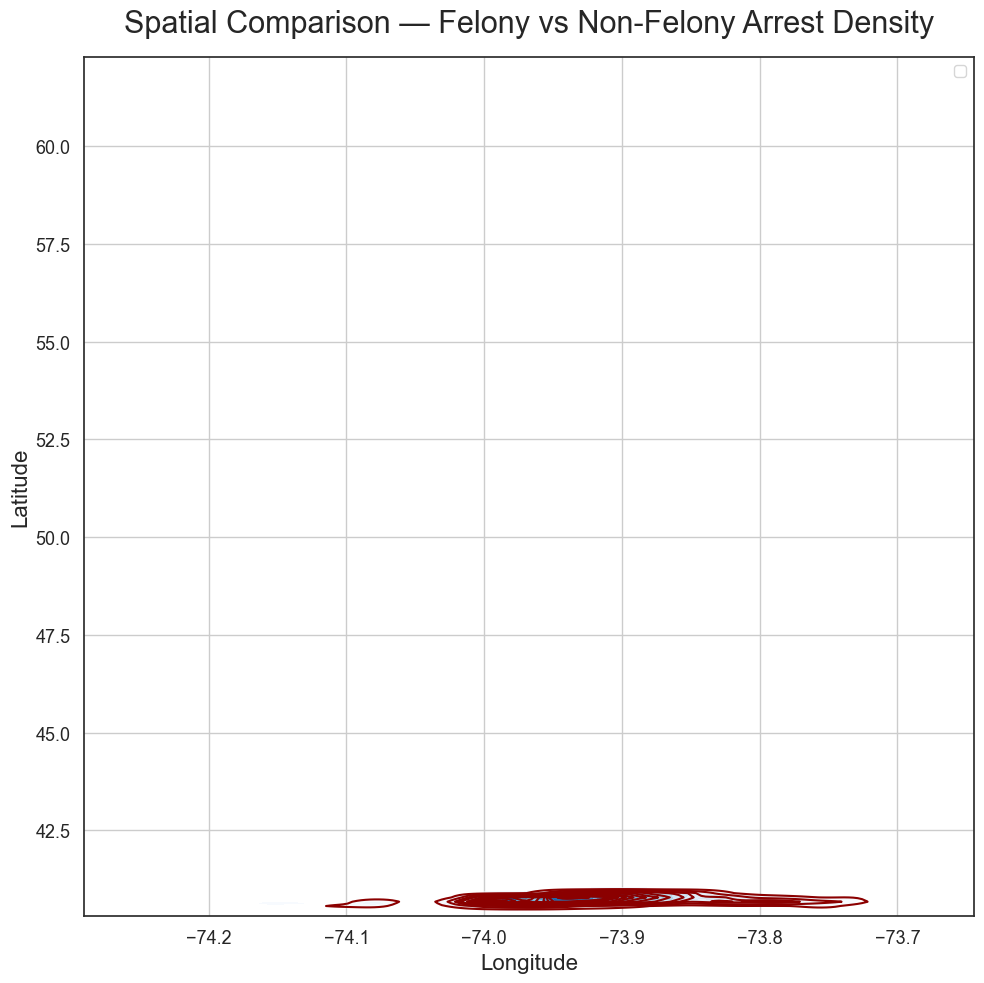

In [12]:
subset = df.sample(150000, random_state=42)

plt.figure(figsize=(10,10))
sns.kdeplot(
    data=subset[subset["felony_flag"]==0],
    x="Longitude", y="Latitude",
    fill=True, cmap="Blues", alpha=0.6,
    thresh=0.05, levels=20,
    label="Non-Felony"
)

sns.kdeplot(
    data=subset[subset["felony_flag"]==1],
    x="Longitude", y="Latitude",
    fill=False, color="darkred",
    linewidth=2,
    levels=15,
    label="Felony"
)

plt.title("Spatial Comparison — Felony vs Non-Felony Arrest Density", fontsize=22)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.tight_layout()
plt.show()


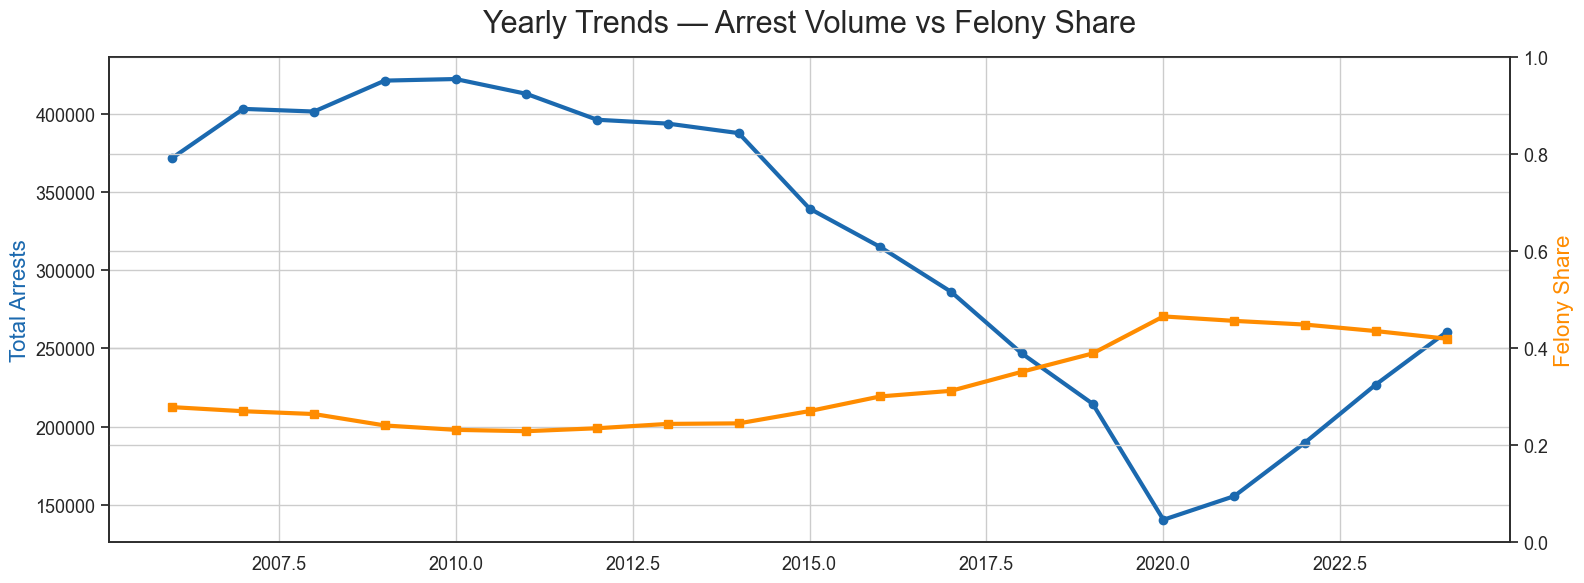

In [13]:
year_stats = (
    df.groupby("Year")["felony_flag"]
      .agg(["count", "mean"])
      .rename(columns={"count": "num_arrests", "mean": "felony_share"})
)

fig, ax1 = plt.subplots(figsize=(16,6))

ax1.plot(
    year_stats.index,
    year_stats["num_arrests"],
    marker="o",
    linewidth=3,
    color=DARK_BLUE,
    label="Total Arrests"
)
ax1.set_ylabel("Total Arrests", color=DARK_BLUE)

ax2 = ax1.twinx()
ax2.plot(
    year_stats.index,
    year_stats["felony_share"],
    marker="s",
    linewidth=3,
    color="darkorange",
    label="Felony Share"
)
ax2.set_ylabel("Felony Share", color="darkorange")
ax2.set_ylim(0,1)

plt.title("Yearly Trends — Arrest Volume vs Felony Share", fontsize=22)
fig.tight_layout()
plt.show()


/var/folders/4l/ps8gtn856617_4nt7nzqdfm80000gn/T/ipykernel_14733/1946065121.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


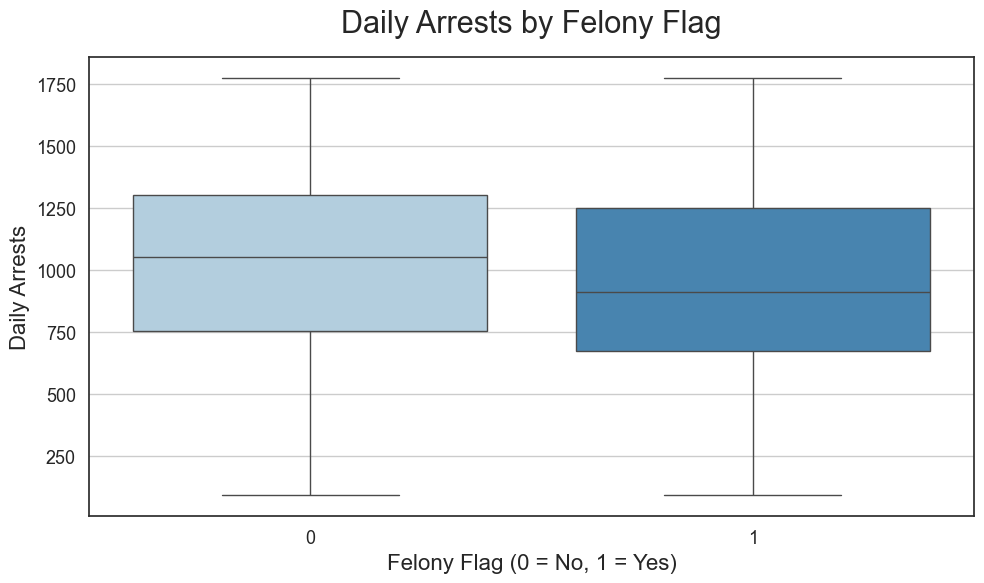

/var/folders/4l/ps8gtn856617_4nt7nzqdfm80000gn/T/ipykernel_14733/1946065121.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


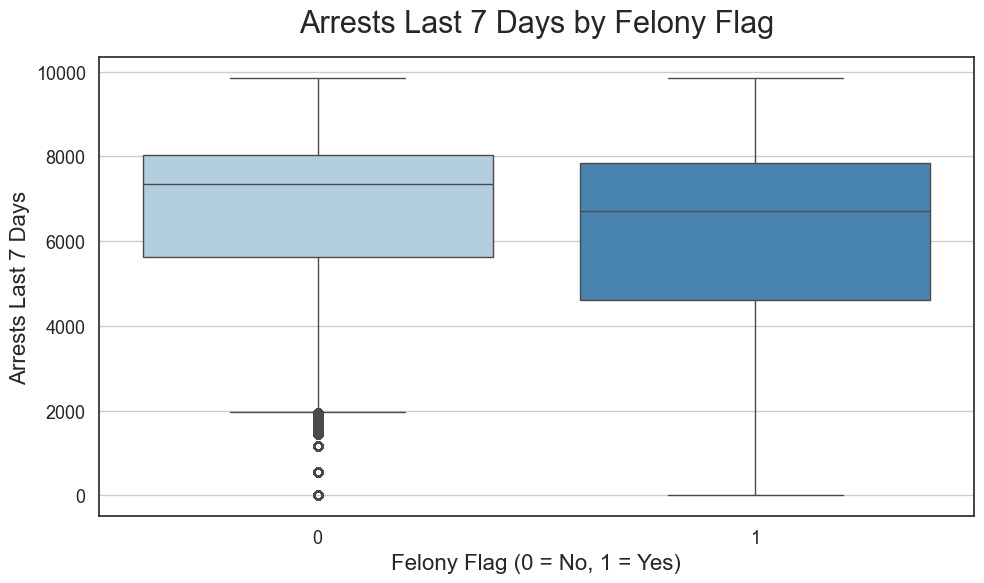

/var/folders/4l/ps8gtn856617_4nt7nzqdfm80000gn/T/ipykernel_14733/1946065121.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


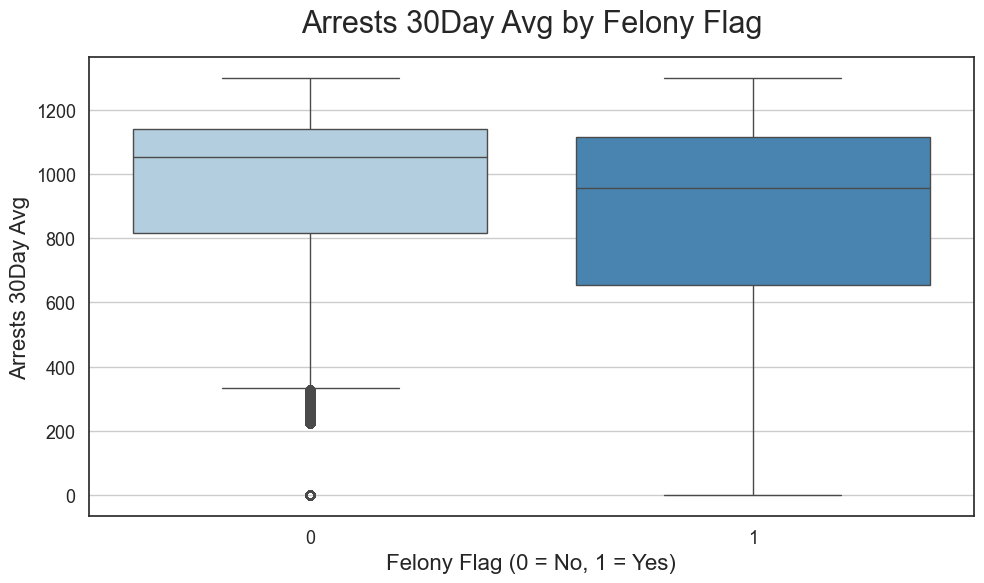

In [14]:
hist_cols = ["daily_arrests", "arrests_last_7_days", "arrests_30day_avg"]

for col in hist_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(
        data=df,
        x="felony_flag",
        y=col,
        palette="Blues"
    )
    plt.title(f"{col.replace('_',' ').title()} by Felony Flag", fontsize=22)
    plt.xlabel("Felony Flag (0 = No, 1 = Yes)")
    plt.ylabel(col.replace('_',' ').title())
    plt.tight_layout()
    plt.show()


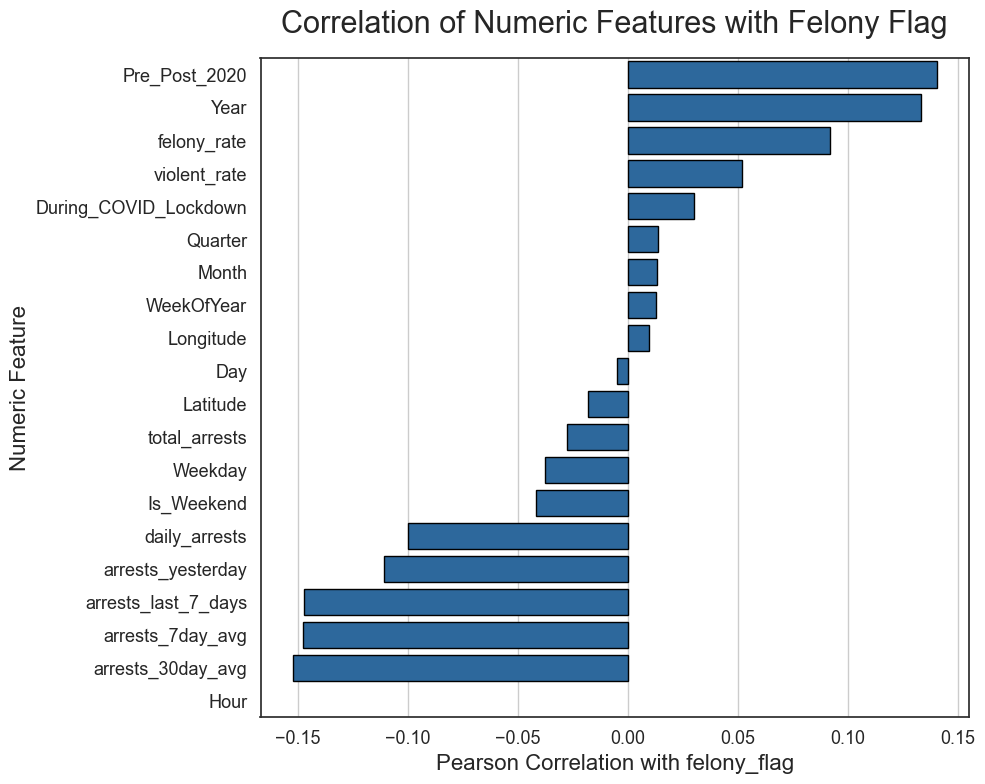

Pre_Post_2020            0.140507
Year                     0.133325
felony_rate              0.092214
violent_rate             0.052028
During_COVID_Lockdown    0.030172
Quarter                  0.013786
Month                    0.013161
WeekOfYear               0.012957
Longitude                0.009534
Day                     -0.004760
Latitude                -0.017838
total_arrests           -0.027364
Weekday                 -0.037448
Is_Weekend              -0.041665
daily_arrests           -0.099666
arrests_yesterday       -0.110542
arrests_last_7_days     -0.147080
arrests_7day_avg        -0.147386
arrests_30day_avg       -0.152196
Hour                          NaN
Name: felony_flag, dtype: float64

In [15]:
numeric_cols = [
    "Year", "Month", "Day", "Hour", "Weekday", "WeekOfYear", "Quarter",
    "Is_Weekend", "Pre_Post_2020", "During_COVID_Lockdown",
    "Latitude", "Longitude",
    "total_arrests", "felony_rate", "violent_rate",
    "daily_arrests", "arrests_yesterday",
    "arrests_last_7_days", "arrests_7day_avg", "arrests_30day_avg"
]

corr_with_felony = (
    df[numeric_cols + ["felony_flag"]]
    .corr()["felony_flag"]
    .drop("felony_flag")
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,8))
sns.barplot(
    x=corr_with_felony.values,
    y=corr_with_felony.index,
    color=DARK_BLUE,
    edgecolor="black"
)
plt.title("Correlation of Numeric Features with Felony Flag", fontsize=22)
plt.xlabel("Pearson Correlation with felony_flag")
plt.ylabel("Numeric Feature")
plt.tight_layout()
plt.show()

corr_with_felony


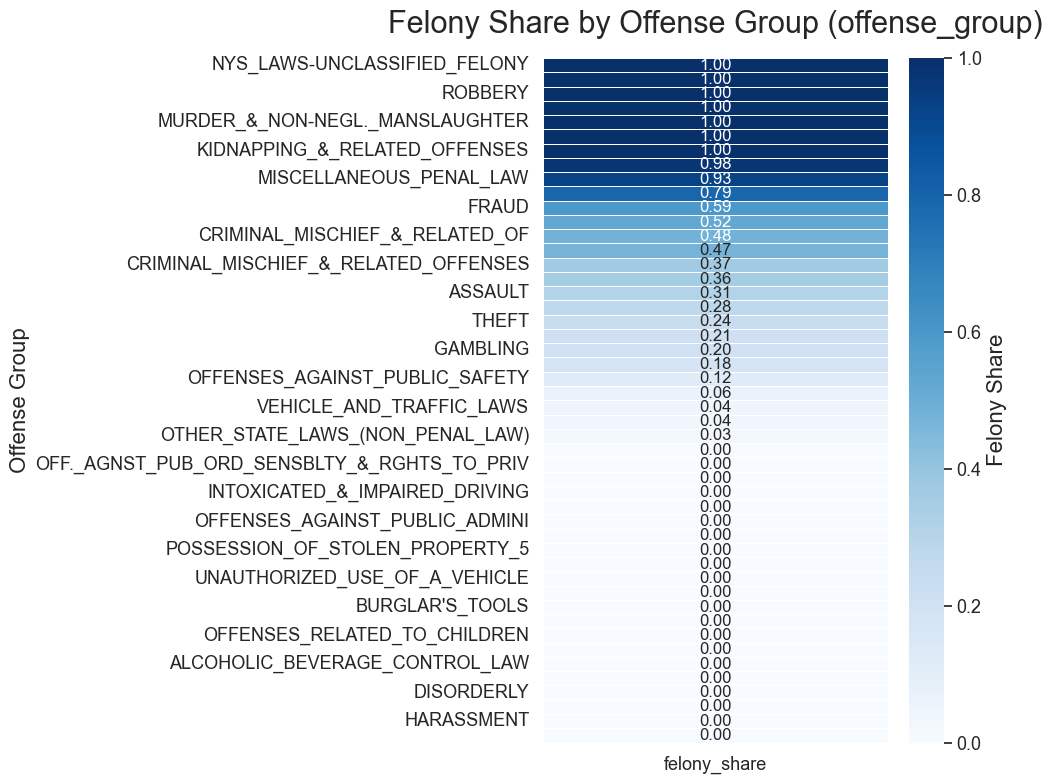

,felony_share,count
offense_group,,
NYS_LAWS-UNCLASSIFIED_FELONY,1.000000,4526
ARSON,1.000000,2457
ROBBERY,1.000000,202169
BURGLARY,1.000000,96064
MURDER_&_NON-NEGL._MANSLAUGHTER,1.000000,12212
MURDER_&_NON-NEGL._MANSLAUGHTE,1.000000,8818
KIDNAPPING_&_RELATED_OFFENSES,1.000000,2489
INTOXICATED/IMPAIRED_DRIVING,0.976409,12547
MISCELLANEOUS_PENAL_LAW,0.926508,233820


In [16]:
offense_felony = (
    df.groupby("offense_group")["felony_flag"]
      .agg(felony_share="mean", count="size")
      .query("count > 1000")     # keep only well-represented offenses
      .sort_values("felony_share", ascending=False)
)

plt.figure(figsize=(10,8))
sns.heatmap(
    offense_felony[["felony_share"]],
    cmap="Blues",
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Felony Share"},
    linewidths=0.5
)
plt.title("Felony Share by Offense Group (offense_group)", fontsize=22)
plt.xlabel("")
plt.ylabel("Offense Group")
plt.tight_layout()
plt.show()

offense_felony.head(15)


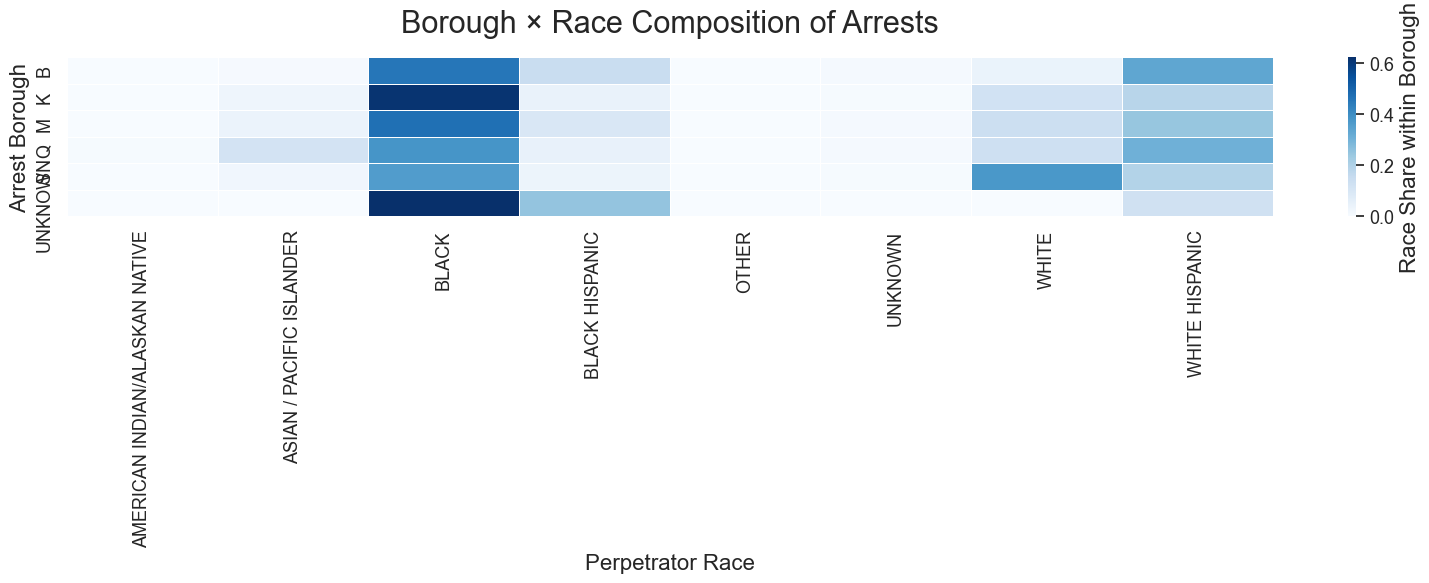

perp_race_clean,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,OTHER,UNKNOWN,WHITE,WHITE HISPANIC
ARREST_BORO,,,,,,,,
B,0.001386,0.009520,0.455031,0.147724,0.000183,0.009907,0.040122,0.336127
K,0.001815,0.028037,0.613200,0.045683,0.000144,0.006063,0.120256,0.184802
M,0.001784,0.038748,0.469604,0.096958,0.000239,0.010609,0.136999,0.245060
Q,0.004950,0.115317,0.381291,0.047937,0.000396,0.012135,0.131328,0.306646
S,0.002209,0.023093,0.362635,0.035982,0.000179,0.006878,0.375455,0.193570
UNKNOWN,0.000000,0.000000,0.625000,0.250000,0.000000,0.000000,0.000000,0.125000


In [17]:
boro_race = (
    df.groupby(["ARREST_BORO", "perp_race_clean"])["ARREST_KEY"]
      .count()
      .reset_index(name="count")
)

# Convert to within-borough percentages
boro_race["percent_within_boro"] = (
    boro_race.groupby("ARREST_BORO")["count"]
             .transform(lambda x: x / x.sum())
)

pivot_boro_race = boro_race.pivot(
    index="ARREST_BORO",
    columns="perp_race_clean",
    values="percent_within_boro"
).fillna(0)

plt.figure(figsize=(16,6))
sns.heatmap(
    pivot_boro_race,
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={"label": "Race Share within Borough"},
)
plt.title("Borough × Race Composition of Arrests", fontsize=22)
plt.xlabel("Perpetrator Race")
plt.ylabel("Arrest Borough")
plt.tight_layout()
plt.show()

pivot_boro_race


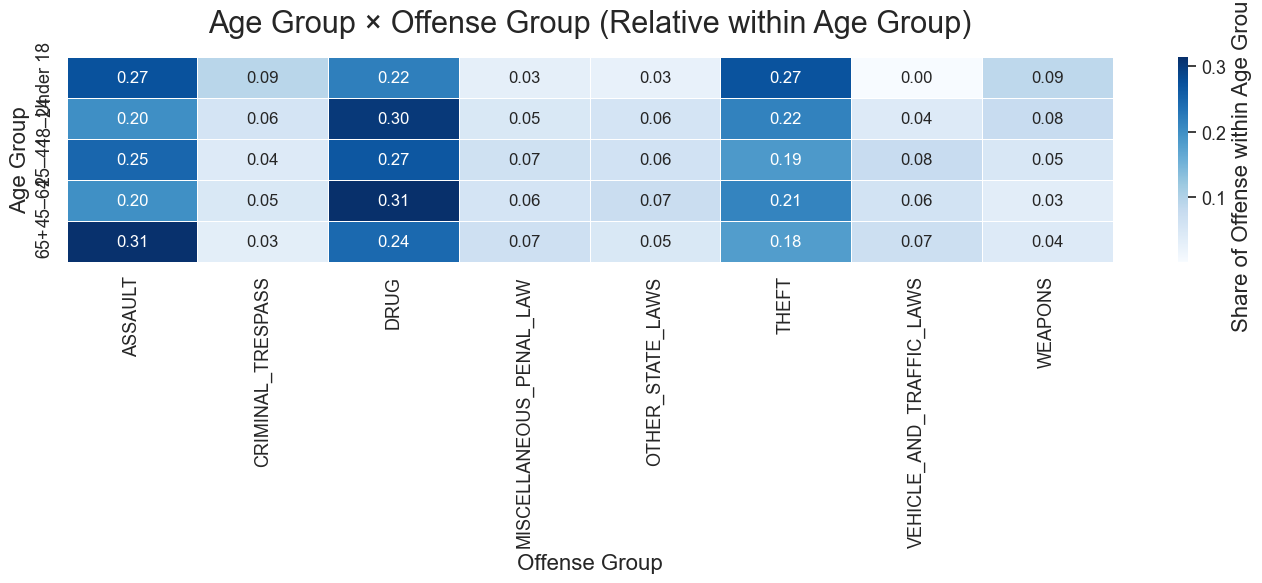

offense_group,ASSAULT,CRIMINAL_TRESPASS,DRUG,MISCELLANEOUS_PENAL_LAW,OTHER_STATE_LAWS,THEFT,VEHICLE_AND_TRAFFIC_LAWS,WEAPONS
AGE_GROUP,,,,,,,,
Under 18,0.272261,0.092982,0.218897,0.030047,0.025338,0.271428,0.001618,0.087429
18–24,0.200088,0.057353,0.301903,0.048852,0.056700,0.215581,0.042513,0.077010
25–44,0.248619,0.042838,0.266162,0.065655,0.062393,0.186605,0.076275,0.051454
45–64,0.198482,0.048918,0.313569,0.056472,0.074197,0.212884,0.060837,0.034642
65+,0.312076,0.034368,0.244479,0.066533,0.048197,0.180985,0.071067,0.042296


In [18]:
# Take top 8 offenses for readability
top_off_names = df["offense_group"].value_counts().head(8).index

age_offense = (
    df[df["offense_group"].isin(top_off_names)]
    .groupby(["AGE_GROUP", "offense_group"])["ARREST_KEY"]
    .count()
    .reset_index(name="count")
)

age_offense["percent_within_age"] = (
    age_offense.groupby("AGE_GROUP")["count"]
               .transform(lambda x: x / x.sum())
)

pivot_age_off = age_offense.pivot(
    index="AGE_GROUP", columns="offense_group", values="percent_within_age"
).loc[["Under 18", "18–24", "25–44", "45–64", "65+"]]

plt.figure(figsize=(14,6))
sns.heatmap(
    pivot_age_off,
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={"label": "Share of Offense within Age Group"},
    annot=True,
    fmt=".2f"
)
plt.title("Age Group × Offense Group (Relative within Age Group)", fontsize=22)
plt.xlabel("Offense Group")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

pivot_age_off


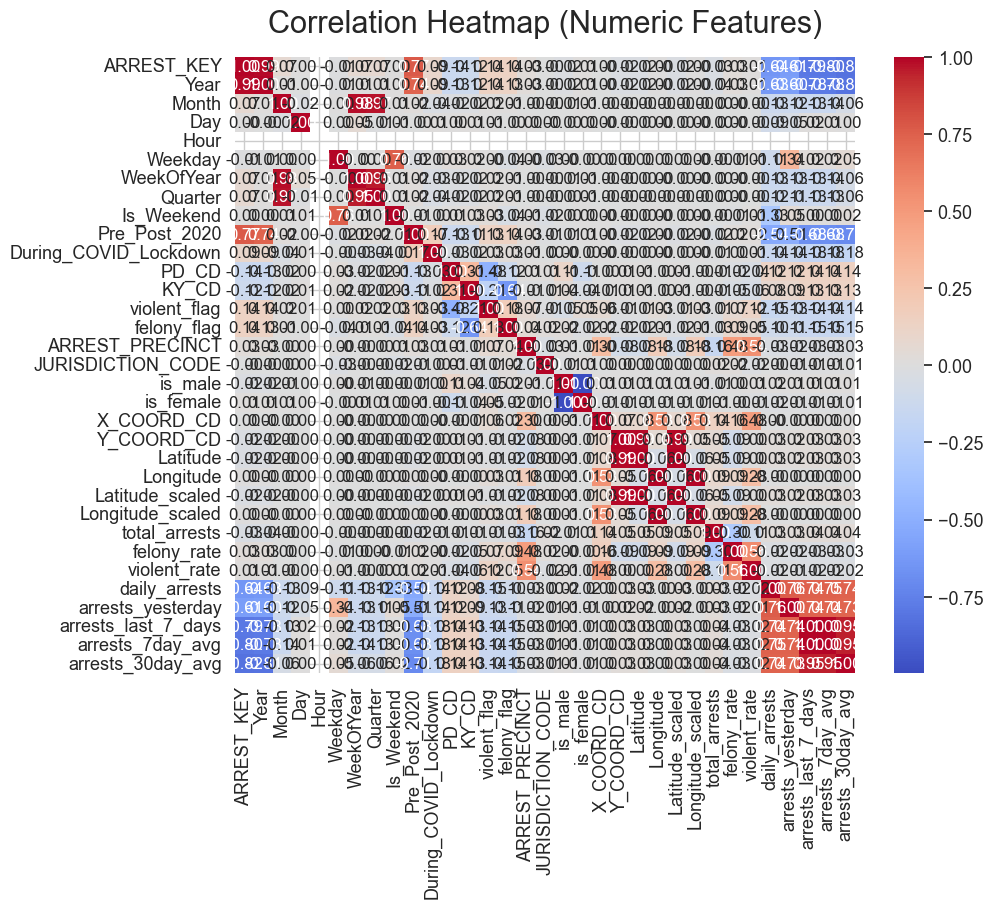

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features only
num_cols = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,8))
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


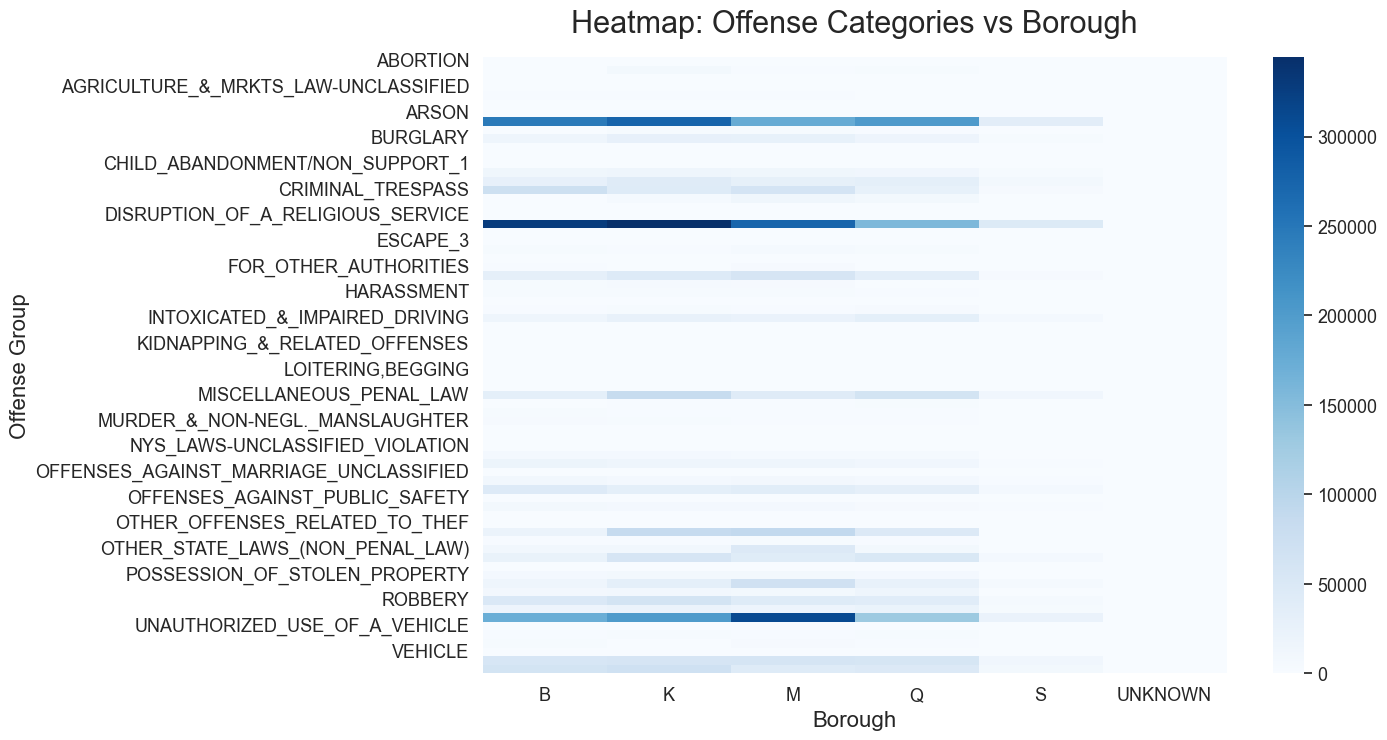

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table
pivot1 = pd.pivot_table(
    df,
    values="ARREST_KEY",
    index="offense_group",
    columns="ARREST_BORO",
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(12,8))
sns.heatmap(pivot1, cmap="Blues", annot=False)
plt.title("Heatmap: Offense Categories vs Borough")
plt.ylabel("Offense Group")
plt.xlabel("Borough")
plt.show()


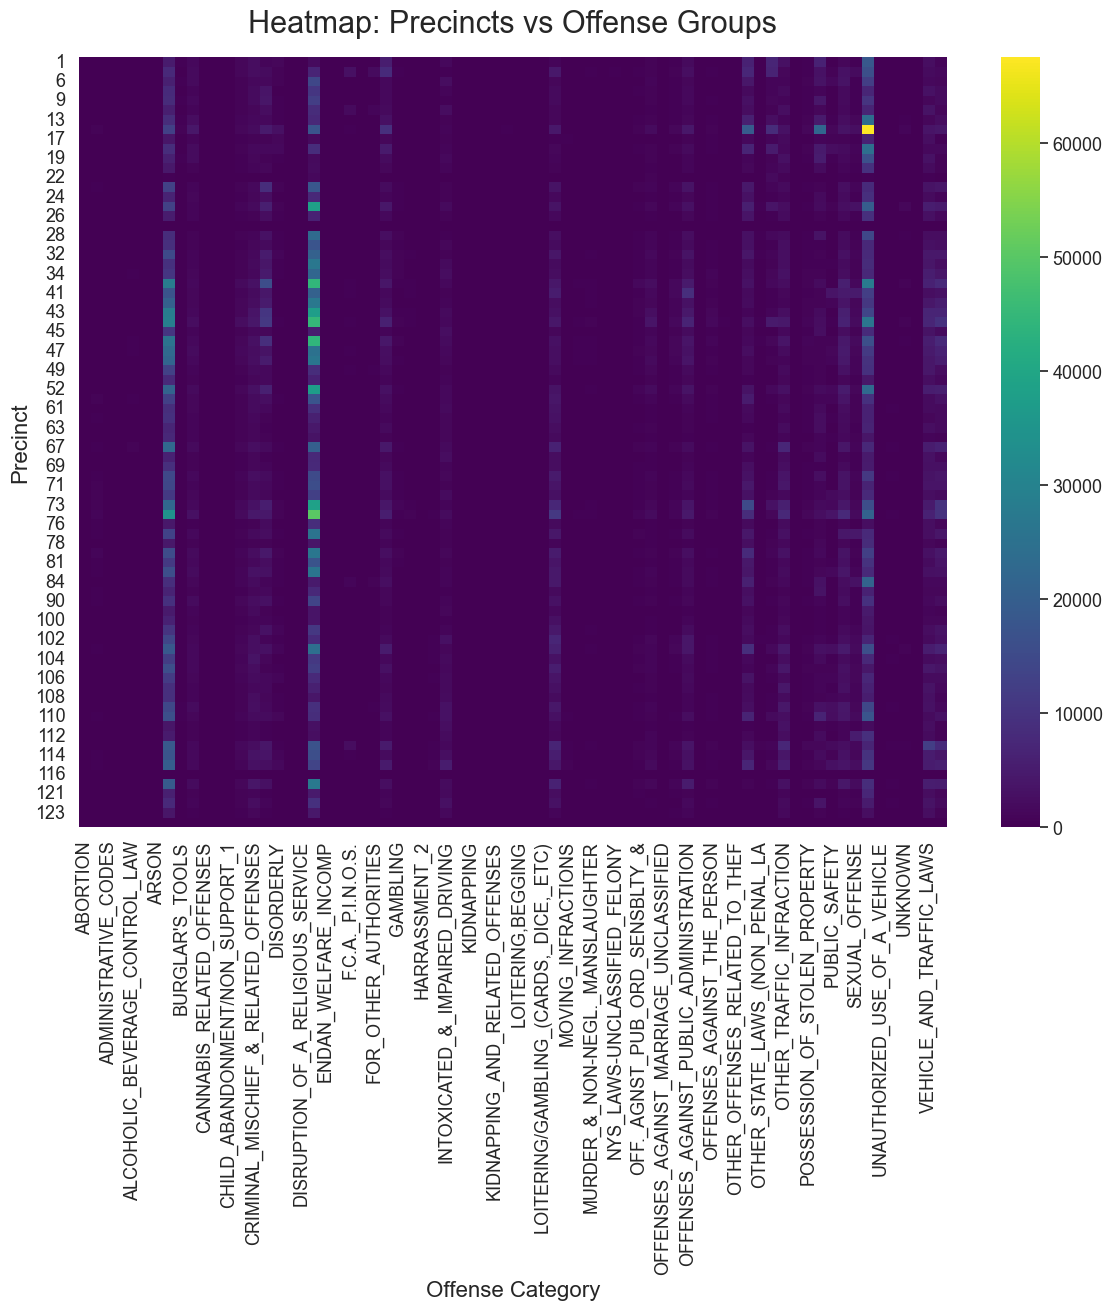

In [21]:
pivot2 = pd.pivot_table(
    df,
    values="ARREST_KEY",
    index="ARREST_PRECINCT",
    columns="offense_group",
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(14,10))
sns.heatmap(pivot2, cmap="viridis")
plt.title("Heatmap: Precincts vs Offense Groups")
plt.xlabel("Offense Category")
plt.ylabel("Precinct")
plt.show()


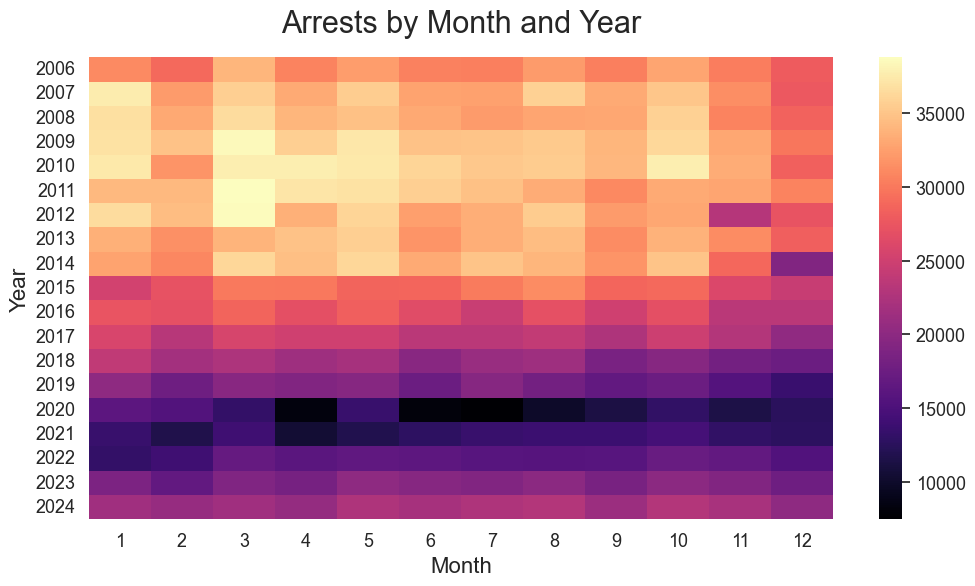

In [22]:
# Extract month/year
df["YEAR"] = df["ARREST_DATE"].dt.year
df["MONTH"] = df["ARREST_DATE"].dt.month

pivot3 = pd.pivot_table(
    df,
    values="ARREST_KEY",
    index="YEAR",
    columns="MONTH",
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot3, cmap="magma")
plt.title("Arrests by Month and Year")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


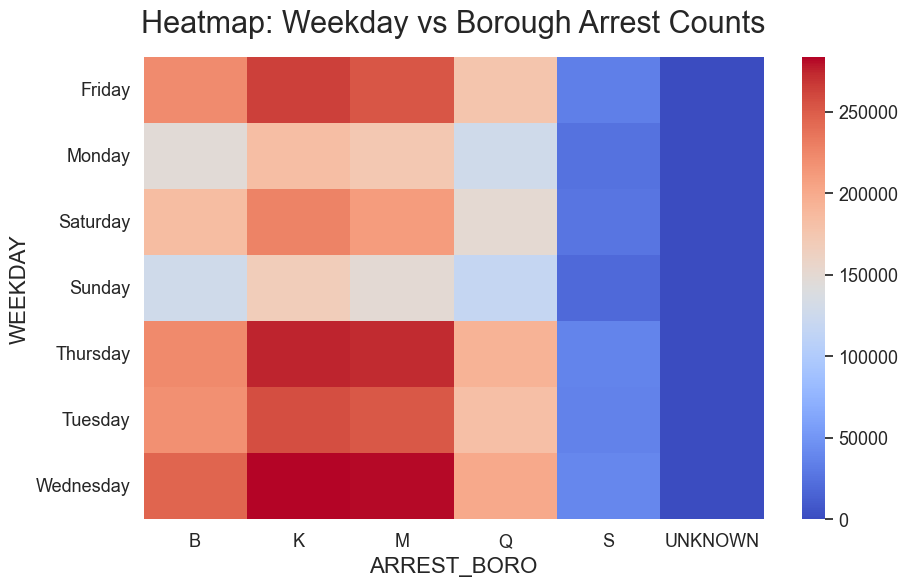

In [23]:
# Extract weekday
df["WEEKDAY"] = df["ARREST_DATE"].dt.day_name()

pivot4 = pd.pivot_table(
    df,
    values="ARREST_KEY",
    index="WEEKDAY",
    columns="ARREST_BORO",
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot4, cmap="coolwarm")
plt.title("Heatmap: Weekday vs Borough Arrest Counts")
plt.show()


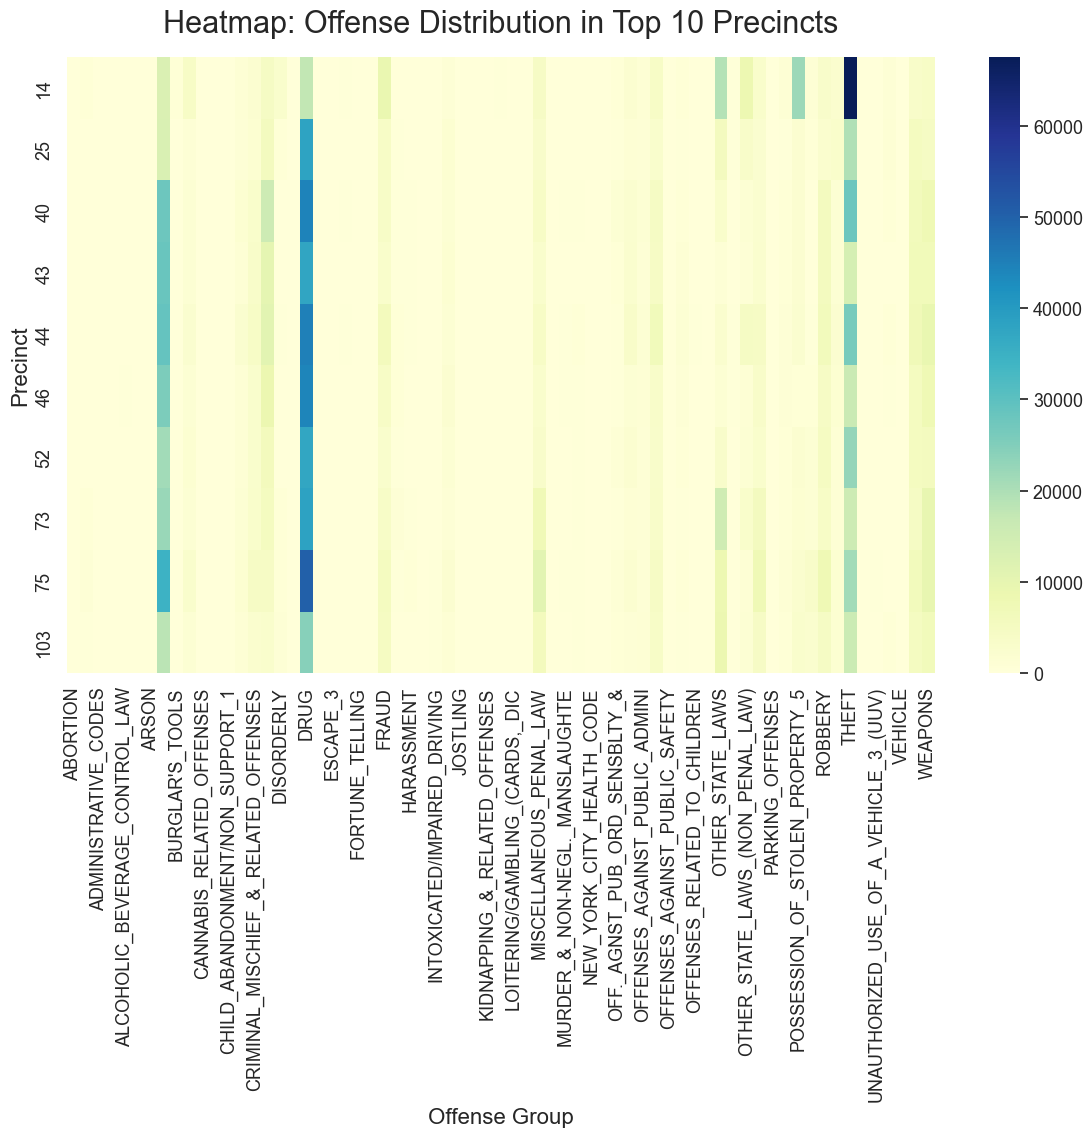

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find top 10 precincts by number of arrests
top_precincts = df["ARREST_PRECINCT"].value_counts().head(10).index
df_top = df[df["ARREST_PRECINCT"].isin(top_precincts)]

pivot_tp = pd.pivot_table(
    df_top,
    values="ARREST_KEY",
    index="ARREST_PRECINCT",
    columns="offense_group",
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(14,8))
sns.heatmap(pivot_tp, cmap="YlGnBu")
plt.title("Heatmap: Offense Distribution in Top 10 Precincts")
plt.xlabel("Offense Group")
plt.ylabel("Precinct")
plt.show()


In [30]:
def clean_age_bucket(age):
    # convert to string first
    if pd.isna(age):
        return "Unknown"

    age = str(age).strip()

    # direct categories already in NYPD data
    if age in ["<18", "18-24", "25-44", "45-64", "65+"]:
        return age

    # sometimes it's written with spaces or weird formatting
    if "-" in age:
        parts = age.split("-")
        try:
            low = int(parts[0])
            high = int(parts[1])
            # bucket to closest standard
            if high <= 17:
                return "<18"
            elif high <= 24:
                return "18-24"
            elif high <= 44:
                return "25-44"
            elif high <= 64:
                return "45-64"
            else:
                return "65+"
        except:
            return "Unknown"

    # if it's numeric (most common issue)
    try:
        num = int(age)
        if num < 18:
            return "<18"
        elif num <= 24:
            return "18-24"
        elif num <= 44:
            return "25-44"
        elif num <= 64:
            return "45-64"
        else:
            return "65+"
    except:
        return "Unknown"

df["age_bucket"] = df["AGE_GROUP"].apply(clean_age_bucket)


In [31]:
def group_offense(x):
    if pd.isna(x):
        return "OTHER"
    x = str(x).upper()

    if "ASSAULT" in x: return "ASSAULT"
    if "THEFT" in x or "LARCENY" in x: return "THEFT"
    if "ROBBERY" in x: return "ROBBERY"
    if "DRUG" in x or "NARCOTIC" in x: return "DRUGS"
    if "WEAPON" in x or "FIREARM" in x: return "WEAPONS"
    if "FRAUD" in x: return "FRAUD"
    if "BURGLARY" in x: return "BURGLARY"
    if "HOMICIDE" in x or "MURDER" in x: return "HOMICIDE"
    if "SEX" in x or "RAPE" in x: return "SEX_OFFENSE"
    if "VEHICLE" in x or "TRAFFIC" in x: return "VEHICLE"
    return "OTHER"

df["offense_group"] = df["OFNS_DESC"].apply(group_offense)


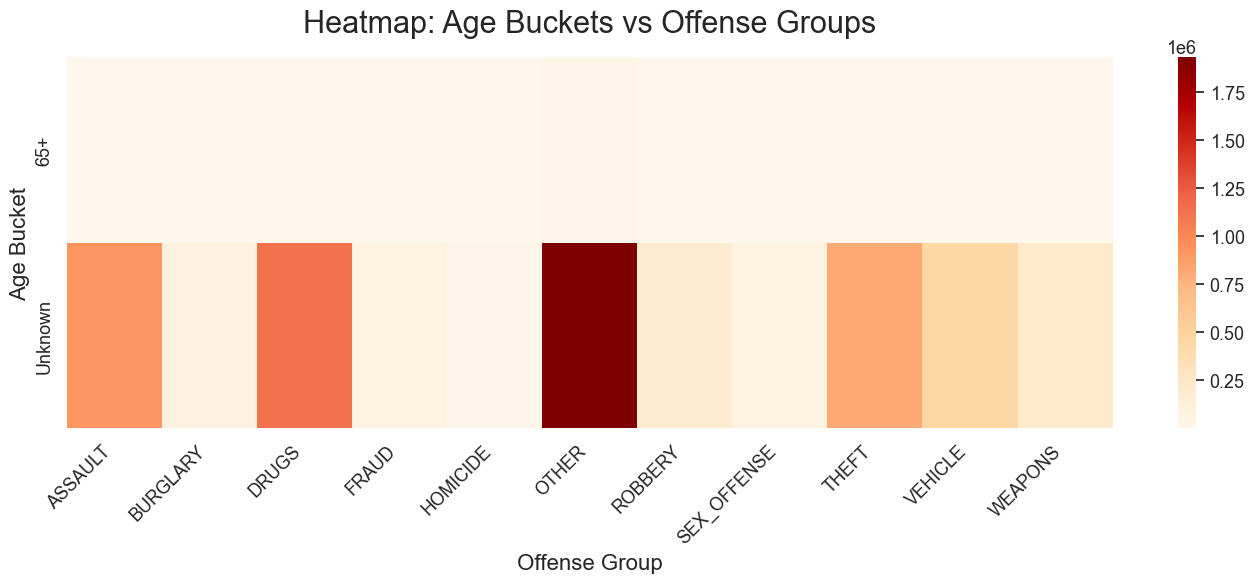

In [33]:
pivot_age = pd.pivot_table(
    df,
    values="ARREST_KEY",
    index="age_bucket",
    columns="offense_group",
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(14,6))
sns.heatmap(pivot_age, cmap="OrRd")
plt.title("Heatmap: Age Buckets vs Offense Groups")
plt.xlabel("Offense Group")
plt.ylabel("Age Bucket")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


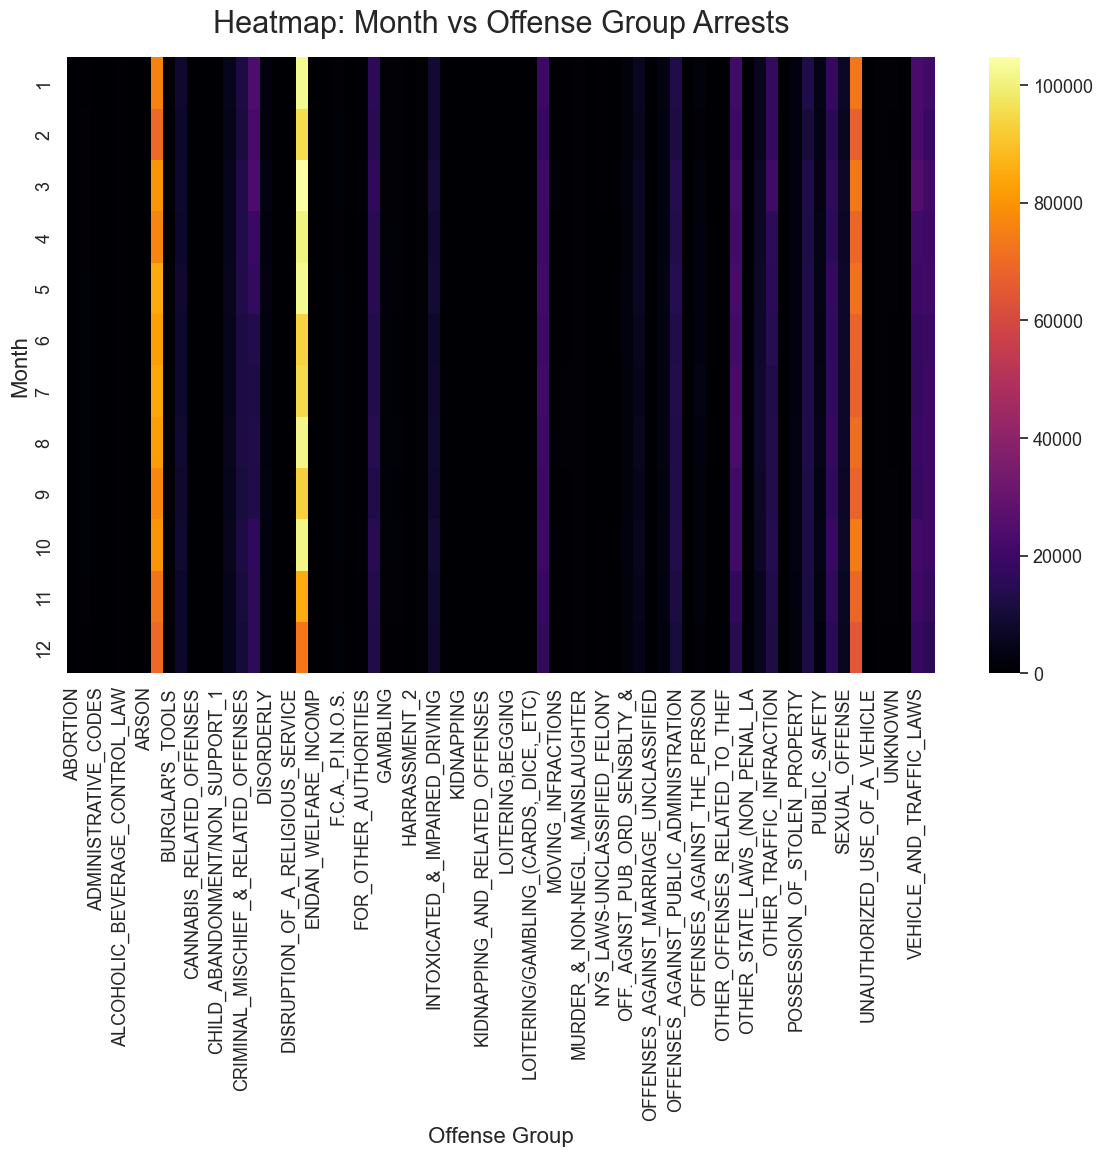

In [26]:
df["MONTH"] = df["ARREST_DATE"].dt.month

pivot_time_offense = pd.pivot_table(
    df,
    values="ARREST_KEY",
    index="MONTH",
    columns="offense_group",
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(14,8))
sns.heatmap(pivot_time_offense, cmap="inferno")
plt.title("Heatmap: Month vs Offense Group Arrests")
plt.xlabel("Offense Group")
plt.ylabel("Month")
plt.show()
